# Fixed water level

The package contains two classes for fixed water level calculations: [ProbPipingFixedWaterlevel](/probabilistic_piping/reference/ProbPipingFixedWaterlevel.html) and [ProbPipingFixedWaterlevelSimple](/probabilistic_piping/reference/ProbPipingFixedWaterlevelSimple.html). These two classes both have methods calculating a single failure probability given a water level (`fixed_waterlevel_failureprobability()`), or for a range of water levels (`fixed_waterlevel_fragilitycurve()`). 

The [ProbPipingFixedWaterlevelSimple](/probabilistic_piping/reference/ProbPipingFixedWaterlevelSimple.html) class calculates the three submechanisms of piping (heave, uplift, sellmeijer) separately and combines the _failure probabilities of the submechanisms_ to a combined failure probability (by taking the minimum failure probability of the three submechanims). This is somewhat different than the `combi` mechanism of [ProbPipingFixedWaterlevel](/probabilistic_piping/reference/ProbPipingFixedWaterlevel.html), where the minimum of the three submechanisms is taken in the _limit state function_. 

The moniker 'Simple' has been added to [ProbPipingFixedWaterlevelSimple](/probabilistic_piping/reference/ProbPipingFixedWaterlevelSimple.html) because taking the minimum of the failure probabilities of the submechanims is seen as a simplified approach.

In this notebook, a comparison of the two approaches is shown.

In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

from probabilistic_piping import (
    ProbInput,
    ProbPipingFixedWaterlevel,
    ProbPipingFixedWaterlevelSimple,
)

The same input data as in the introduction is used and converted to the required [ProbInput](/probabilistic_piping/reference/ProbInput.html) format.

In [2]:
data_path = Path("../../../test/data/full_test.xlsx")
df_input = pd.read_excel(data_path, sheet_name="input", index_col=0, header=0)
inp_data = ProbInput.from_dataframe(df_input)

First, we calculate the failure probability for the given input using the [ProbPipingFixedWaterlevel](/probabilistic_piping/reference/ProbPipingFixedWaterlevel.html) class.

In [3]:
prob = ProbPipingFixedWaterlevel(progress=False)
_, pc = prob.fixed_waterlevel_fragilitycurve(inp_data, z_type="combi")

Then we calculate the failure probability using the [ProbPipingFixedWaterlevelSimple](/probabilistic_piping/reference/ProbPipingFixedWaterlevelSimple.html) class. Notice that this class returns four results: three submechanism results and one combined result.

In [4]:
prob_simple = ProbPipingFixedWaterlevelSimple(progress=False)
_, pu, ph, pp, pcs = prob_simple.fixed_waterlevel_fragilitycurve(inp_data)

We can now visually compare the results of the two approaches. The results are subtly different, but overal comparable.

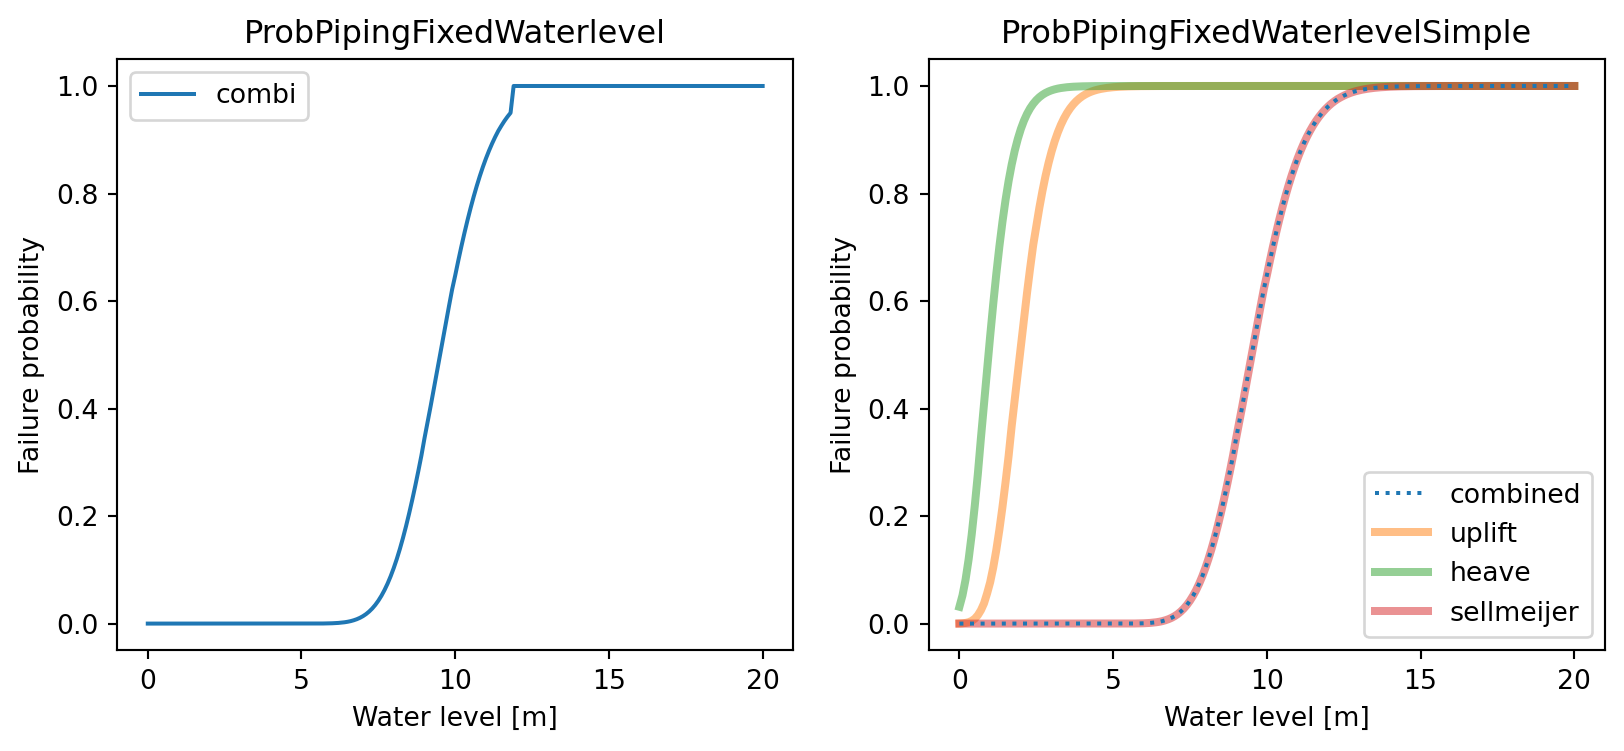

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
ax1.set_title("ProbPipingFixedWaterlevel")
ax1.plot([r.h for r in pc.results], [r.prob_cond for r in pc.results], label="combi")
ax1.set_xlabel("Water level [m]")
ax1.set_ylabel("Failure probability")
ax1.legend()

wl = [r.h for r in pcs.results]
ax2.set_title("ProbPipingFixedWaterlevelSimple")
ax2.plot(wl, [r.prob_cond for r in pcs.results], label="combined", ls=":", zorder=10)
ax2.plot(wl, [r.prob_cond for r in pu.results], label="uplift", lw=3, alpha=0.5)
ax2.plot(wl, [r.prob_cond for r in ph.results], label="heave", lw=3, alpha=0.5)
ax2.plot(wl, [r.prob_cond for r in pp.results], label="sellmeijer", lw=3, alpha=0.5)
ax2.set_xlabel("Water level [m]")
ax2.set_ylabel("Failure probability")
ax2.legend();